In [1]:
# perform a backwards stepwise regression
from sklearn.feature_selection import RFE
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from pandas import concat
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

from pandas import read_csv
data = read_csv('Well_cleaned_OneyearOneSN.csv', header=0, index_col=0)
data.shape

(105365, 8)

In [2]:
# create input and output parameters
from pandas import concat
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

feature_cols = ['Ghi','Azimuth','CloudOpacity','Dhi','Dni','Ebh','Zenith']
X = data[feature_cols]
y = data.PV

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle = False)

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


(84292, 7) (84292,) (21073, 7) (21073,)


In [3]:
# fit reduced model
reg = LinearRegression()
reduced_reg = RFE(reg)
reduced_reg.fit(train_X, train_y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=None, step=1, verbose=0)

In [4]:
reduced_reg.score(X= test_X, y = test_y)

0.7825867522937381

In [5]:
# predict using the reduced model
reduced_pred_y = reduced_reg.predict(test_X)

In [14]:
import pandas as pd
df2 = pd.DataFrame({'Actual': test_y, 'Predicted': reduced_pred_y})
print(df2)
print(len(df2))

               Actual  Predicted
PeriodEnd                       
21/5/19 19:55     0.0  18.968604
21/5/19 20:00     0.0  18.968604
21/5/19 20:05     0.0  18.968604
21/5/19 20:10     0.0  18.968604
21/5/19 20:15     0.0  18.968604
21/5/19 20:20     0.0  18.968604
21/5/19 20:25     0.0  18.968604
21/5/19 20:30     0.0  18.968604
21/5/19 20:35     0.0  18.968604
21/5/19 20:40     0.0  18.968604
21/5/19 20:45     0.0  18.968604
21/5/19 20:50     0.0  18.968604
21/5/19 20:55     0.0  18.968604
21/5/19 21:00     0.0  18.968604
21/5/19 21:05     0.0  18.968604
21/5/19 21:10     0.0  18.968604
21/5/19 21:15     0.0  18.968604
21/5/19 21:20     0.0  18.968604
21/5/19 21:25     0.0  18.968604
21/5/19 21:30     0.0  18.968604
21/5/19 21:35     0.0  18.968604
21/5/19 21:40     0.0  18.968604
21/5/19 21:45     0.0  18.968604
21/5/19 21:50     0.0  18.968604
21/5/19 21:55     0.0  18.968604
21/5/19 22:00     0.0  18.968604
21/5/19 22:05     0.0  18.968604
21/5/19 22:10     0.0  18.968604
21/5/19 22

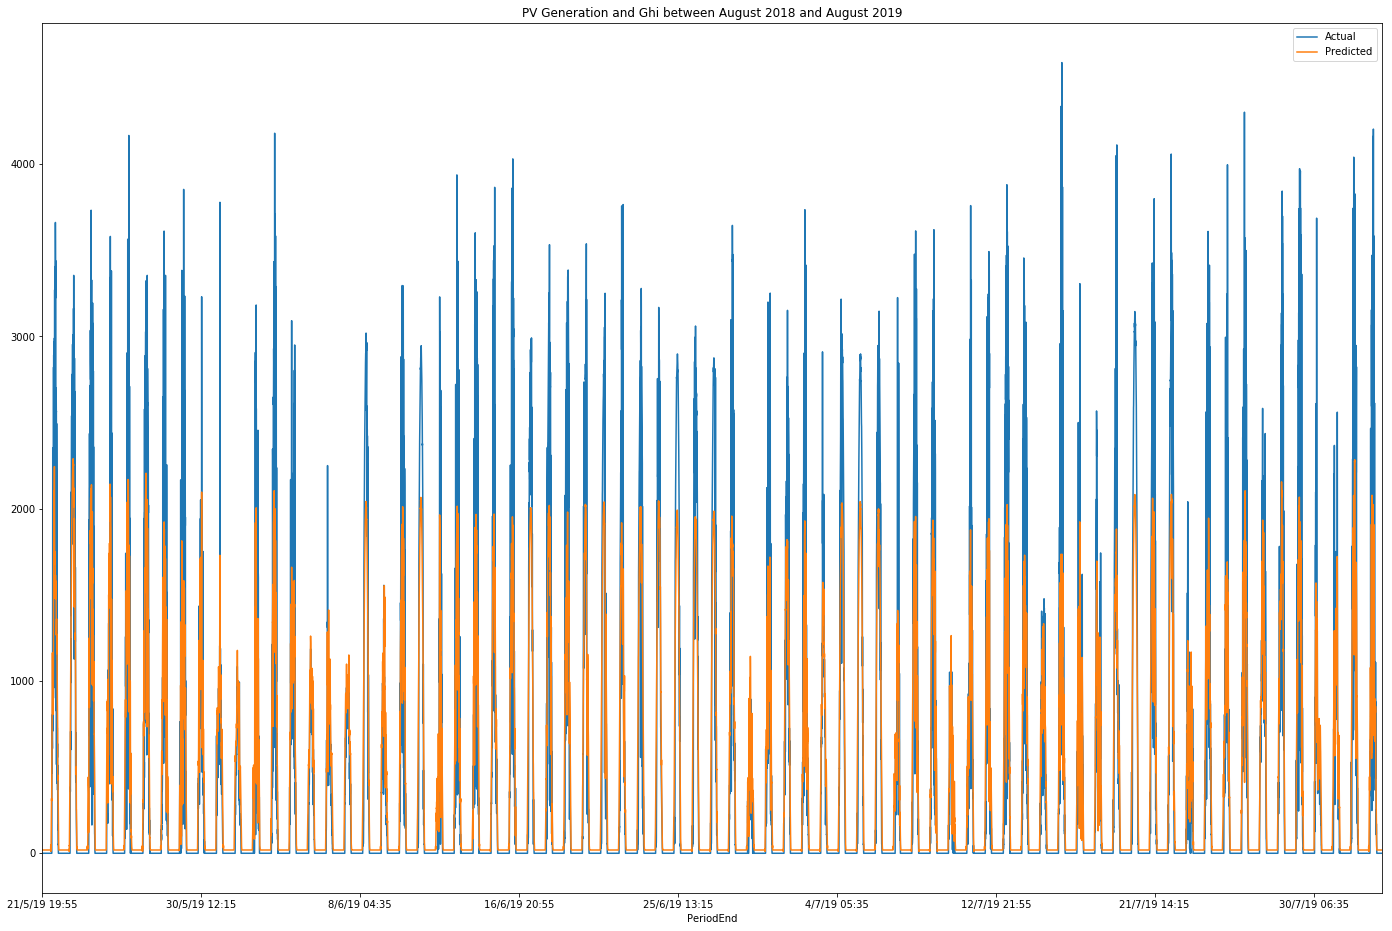

In [18]:
from matplotlib import pyplot
df2.reset_index().plot(x='PeriodEnd', y=['Actual','Predicted'])
plt.title('PV Generation and Ghi between August 2018 and August 2019')
pyplot.rcParams['figure.figsize']=18,12

In [ ]:
import matplotlib.pyplot as plt
# plot results
plt.plot(reduced_pred_y, c='green', label='Predicted')
plt.plot(test_y, c='orange', label='Observed')

# dataset.reset_index().plot(x='PeriodEnd', y=[pred_y,test_y])
plt.title('reduced_Observed vs Predicted')
plt.ylabel('PV')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

In [8]:
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, reduced_pred_y))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, reduced_pred_y))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, reduced_pred_y)))

Mean Absolute Error: 186.17498348677046
Mean Squared Error: 140891.63338398395
Root Mean Squared Error: 375.3553428206184


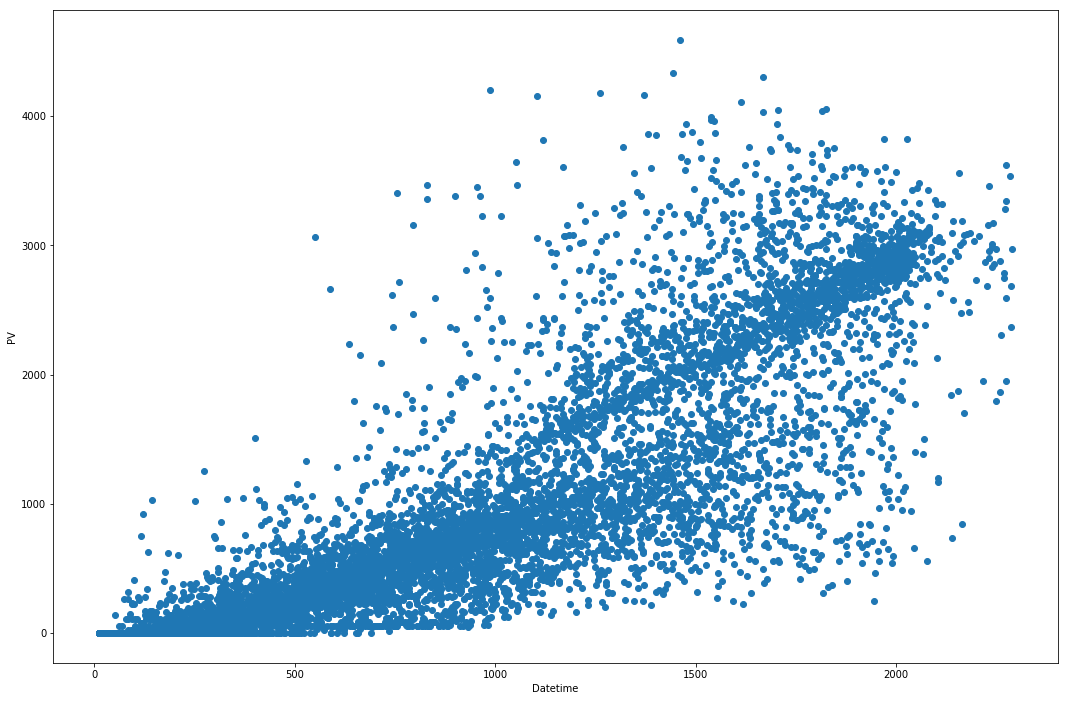

In [19]:
import matplotlib.pyplot as plt
plt.scatter(reduced_pred_y, test_y)
plt.xlabel('Datetime')
plt.ylabel('PV')
plt.show()